In [1]:
import sys
import sys
from pathlib import Path
sys.path.append('/pasteur/appa/homes/ahabis/WSS-UIC')
from torchvision.models import resnet50
from models import *
import numpy as np
import os 
from config import *
from correction_SVM.iteration_correction import metrics
import matplotlib.pyplot as plt

In [2]:
# Find the best threshold for the model classification
def model_metrics(threshold):
    # longest one-liner
    i = 0
    for image in val_set:
        predictions = np.mean(np.squeeze(np.load(os.path.join(os.path.join(path_prediction_features, image),'predictionsresnet50.npy'))),0)
        trues = np.load(os.path.join(os.path.join(path_prediction_features, image),'trues.npy'))
        i+=metrics(predictions>threshold,trues)[3]
    return i/len(val_set)

threshold_range = np.arange(0,1,0.01)
f_score_range = [model_metrics(i) for i in threshold_range]
optimal_threshold = np.argmax(f_score_range)/len(threshold_range)
optimal_f_score = model_metrics(optimal_threshold)

print('Best model threshold:', optimal_threshold)

Best model threshold: 0.36


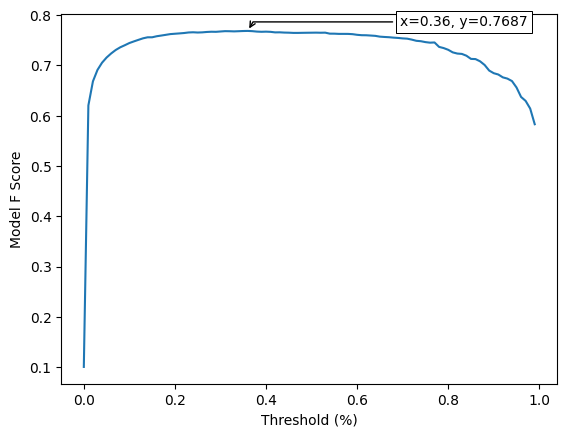

In [3]:
#plot 
plt.plot(threshold_range,f_score_range)
plt.xlabel("Threshold (%)")
plt.ylabel("Model F Score")

text= "x={:.2f}, y={:.4f}".format(optimal_threshold, optimal_f_score)
ax=plt.gca()
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
arrowprops = dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
kw = dict(xycoords='data',textcoords="axes fraction",
            arrowprops=arrowprops, bbox=bbox_props, ha="right", va="bottom")
ax.annotate(text, xy=(optimal_threshold, optimal_f_score), xytext=(0.94,0.96), **kw)
plt.show()